In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df=pd.read_csv("h1n1_vaccine_prediction.csv")

In [3]:
df

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0


In [4]:
df.shape

(26707, 34)

In [5]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [6]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [7]:
df.drop(["unique_id"],axis=1,inplace=True)
df

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0


In [8]:
df.dtypes

h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
marital_status                object
h

In [9]:
df.isnull().sum()

h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status                2042
employment          

In [10]:
median1=df["h1n1_worry"].median()
df["h1n1_worry"]=df["h1n1_worry"].replace(np.nan,median1)

In [11]:
median2=df["h1n1_awareness"].median()
df["h1n1_awareness"]=df["h1n1_awareness"].replace(np.nan,median2)

In [12]:
median3=df["antiviral_medication"].median()
df["antiviral_medication"]=df["antiviral_medication"].replace(np.nan,median3)

In [13]:
median4=df["contact_avoidance"].median()
df["contact_avoidance"]=df["contact_avoidance"].replace(np.nan,median4)

In [14]:
median5=df["bought_face_mask"].median()
df["bought_face_mask"]=df["bought_face_mask"].replace(np.nan,median5)

In [15]:
median6=df["wash_hands_frequently"].median()
df["wash_hands_frequently"]=df["wash_hands_frequently"].replace(np.nan,median6)

In [16]:
median7=df["avoid_large_gatherings"].median()
df["avoid_large_gatherings"]=df["avoid_large_gatherings"].replace(np.nan,median7)

In [17]:
median8=df["avoid_touch_face"].median()
df["avoid_touch_face"]=df["avoid_touch_face"].replace(np.nan,median8)

In [18]:
median9=df["reduced_outside_home_cont"].median()
df["reduced_outside_home_cont"]=df["reduced_outside_home_cont"].replace(np.nan,median9)

In [19]:
median10=df["dr_recc_h1n1_vacc"].median()
df["dr_recc_h1n1_vacc"]=df["dr_recc_h1n1_vacc"].replace(np.nan,median10)

In [20]:
median11=df["dr_recc_seasonal_vacc"].median()
df["dr_recc_seasonal_vacc"]=df["dr_recc_seasonal_vacc"].replace(np.nan,median11)

In [21]:
median12=df["chronic_medic_condition"].median()
df["chronic_medic_condition"]=df["chronic_medic_condition"].replace(np.nan,median12)

In [22]:
median13=df["cont_child_undr_6_mnths"].median()
df["cont_child_undr_6_mnths"]=df["cont_child_undr_6_mnths"].replace(np.nan,median13)

In [23]:
median14=df["is_health_worker"].median()
df["is_health_worker"]=df["is_health_worker"].replace(np.nan,median14)

In [24]:
median15=df["has_health_insur"].median()
df["has_health_insur"]=df["has_health_insur"].replace(np.nan,median15)

In [25]:
median16=df["is_h1n1_vacc_effective"].median()
df["is_h1n1_vacc_effective"]=df["is_h1n1_vacc_effective"].replace(np.nan,median16)

In [26]:
median17=df["is_h1n1_risky"].median()
df["is_h1n1_risky"]=df["is_h1n1_risky"].replace(np.nan,median17)

In [27]:
median18=df["sick_from_h1n1_vacc"].median()
df["sick_from_h1n1_vacc"]=df["sick_from_h1n1_vacc"].replace(np.nan,median18)

In [28]:
median19=df["sick_from_seas_vacc"].median()
df["sick_from_seas_vacc"]=df["sick_from_seas_vacc"].replace(np.nan,median19)

In [29]:
median20=df["is_seas_vacc_effective"].median()
df["is_seas_vacc_effective"]=df["is_seas_vacc_effective"].replace(np.nan,median20)

In [30]:
median21=df["is_seas_risky"].median()
df["is_seas_risky"]=df["is_seas_risky"].replace(np.nan,median21)

In [31]:
median22=df["no_of_adults"].median()
df["no_of_adults"]=df["no_of_adults"].replace(np.nan,median22)

In [32]:
median23=df["no_of_children"].median()
df["no_of_children"]=df["no_of_children"].replace(np.nan,median23)

In [33]:
mode2=df["qualification"].mode().values[0]
df["qualification"]=df["qualification"].replace(np.nan,mode2)

In [34]:
mode5=df["income_level"].mode().values[0]
df["income_level"]=df["income_level"].replace(np.nan,mode5)

In [35]:
mode6=df["marital_status"].mode().values[0]
df["marital_status"]=df["marital_status"].replace(np.nan,mode6)

In [36]:
mode7=df["housing_status"].mode().values[0]
df["housing_status"]=df["housing_status"].replace(np.nan,mode7)

In [37]:
mode8=df["employment"].mode().values[0]
df["employment"]=df["employment"].replace(np.nan,mode8)

In [38]:
df.isnull().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vac

In [39]:
df.duplicated().sum()

12

In [40]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [41]:
df

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",0.0,0.0,0
26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0


In [42]:
df["h1n1_worry"]=df["h1n1_worry"].replace({0:"Not worried at all",1:"Not very worried",2:"Somewhat worried",3:"Very worried"})

In [43]:
df

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,Not very worried,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,Very worried,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,Not very worried,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,Not very worried,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,Somewhat worried,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,Somewhat worried,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,Not very worried,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,Somewhat worried,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",0.0,0.0,0
26705,Not very worried,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0


In [44]:
df["h1n1_awareness"]=df["h1n1_awareness"].map({0:"No knowledge",1:"little knowledge",2:"good knowledge"})
df

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,Not very worried,No knowledge,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,Very worried,good knowledge,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,Not very worried,little knowledge,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,Not very worried,little knowledge,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,Somewhat worried,little knowledge,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,Somewhat worried,No knowledge,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,Not very worried,good knowledge,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,Somewhat worried,good knowledge,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",0.0,0.0,0
26705,Not very worried,little knowledge,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0


In [45]:
df["is_h1n1_vacc_effective"].unique()

array([3., 5., 4., 2., 1.])

In [46]:
df["is_h1n1_vacc_effective"]=df["is_h1n1_vacc_effective"].map({1:"Thinks not effective at all",2:"Thinks it is not very effective",3:"Doesn't know if it is effective or not",4:"Thinks it is somewhat effective",5:"Thinks it is highly effective"})

In [47]:
df["is_h1n1_vacc_effective"].unique()

array(["Doesn't know if it is effective or not",
       'Thinks it is highly effective', 'Thinks it is somewhat effective',
       'Thinks it is not very effective', 'Thinks not effective at all'],
      dtype=object)

In [48]:
df["is_h1n1_risky"]=df["is_h1n1_risky"].map({1:"Thinks it is not very low risk",2:"Thinks it is somewhat low risk",3:"don’t know if it is risky or not",4:"Thinks it is a somewhat high risk",5:"Thinks it is very highly risky"})

In [49]:
df["is_h1n1_risky"].unique()

array(['Thinks it is not very low risk',
       'Thinks it is a somewhat high risk',
       'don’t know if it is risky or not',
       'Thinks it is somewhat low risk', 'Thinks it is very highly risky'],
      dtype=object)

In [50]:
df["sick_from_h1n1_vacc"]=df["sick_from_h1n1_vacc"].map({1:"Respondent not worried at all",2:"Respondent is not very worried",3:"Doesn't know",4:"Respondent is somewhat worried",5:"Respondent is very worried"})

In [51]:
df["sick_from_h1n1_vacc"].unique()

array(['Respondent is not very worried', 'Respondent is somewhat worried',
       'Respondent not worried at all', 'Respondent is very worried',
       "Doesn't know"], dtype=object)

In [52]:
df["is_seas_vacc_effective"]=df["is_seas_vacc_effective"].map({1:"Thinks not effective at all",2:"Thinks it is not very effective",3:"Doesn't know if it is effective or not,",4:"Thinks it is somewhat effective",5:"Thinks it is highly effective)"})

In [53]:
df["is_seas_vacc_effective"].unique()

array(['Thinks it is not very effective',
       'Thinks it is somewhat effective',
       'Thinks it is highly effective)',
       "Doesn't know if it is effective or not,",
       'Thinks not effective at all'], dtype=object)

In [54]:
df["is_seas_risky"]=df["is_seas_risky"].map({1:"Thinks it is not very low risk",2:"Thinks it is somewhat low risk",3:"Doesn't know if it is risky or not",4:"Thinks it is somewhat high risk",5:"Thinks it is very highly risky"})

In [55]:
df["is_seas_risky"].unique()

array(['Thinks it is not very low risk', 'Thinks it is somewhat low risk',
       'Thinks it is somewhat high risk',
       "Doesn't know if it is risky or not",
       'Thinks it is very highly risky'], dtype=object)

In [56]:
df["sick_from_seas_vacc"] = df["sick_from_seas_vacc"].map({1:"Respondent not worried at all",2:"Respondent is not very worried",3:"Doesn't know",4:"Respondent is somewhat worried",5:"Respondent is very worried"})

In [57]:
df["sick_from_seas_vacc"].unique()

array(['Respondent is not very worried', 'Respondent is somewhat worried',
       'Respondent not worried at all', 'Respondent is very worried',
       "Doesn't know"], dtype=object)

In [58]:
df["age_bracket"].unique()

array(['55 - 64 Years', '35 - 44 Years', '18 - 34 Years', '65+ Years',
       '45 - 54 Years'], dtype=object)

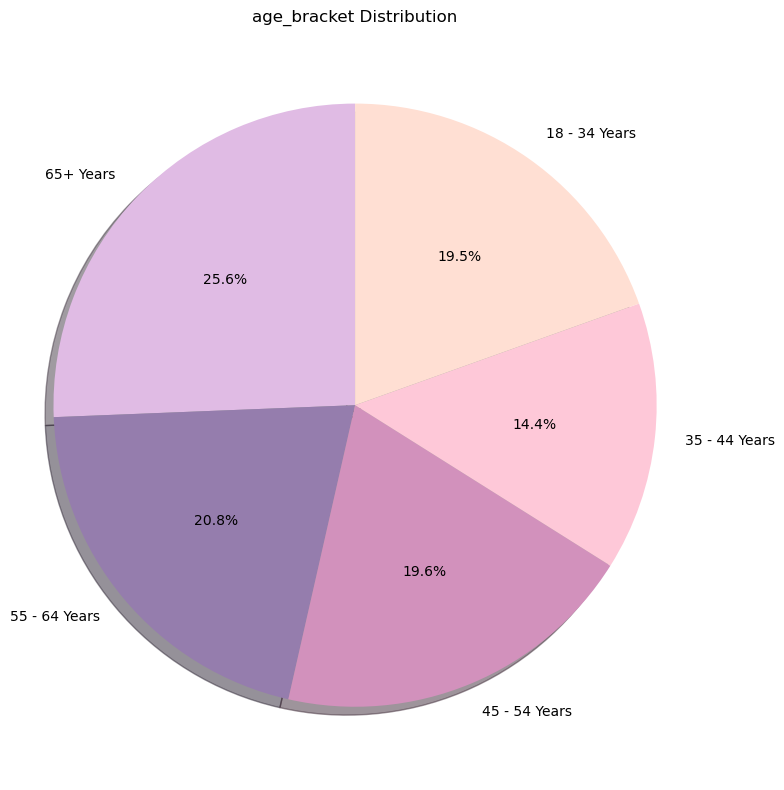

In [59]:
labels = df['age_bracket'].unique()
sizes = (df['age_bracket'].value_counts()/df['age_bracket'].value_counts().sum())*100
sizes = sizes.sort_index(ascending=False)
labels = sizes.index
plt.figure(figsize=(8,8))
colors = ['#E0BBE4', '#957DAD', '#D291BC', '#FEC8D8', '#FFDFD3']
plt.pie(sizes,labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors)
plt.axis('equal')
plt.title("age_bracket Distribution")
plt.tight_layout()
plt.show()

In [60]:
df["qualification"].unique()

array(['< 12 Years', '12 Years', 'College Graduate', 'Some College'],
      dtype=object)

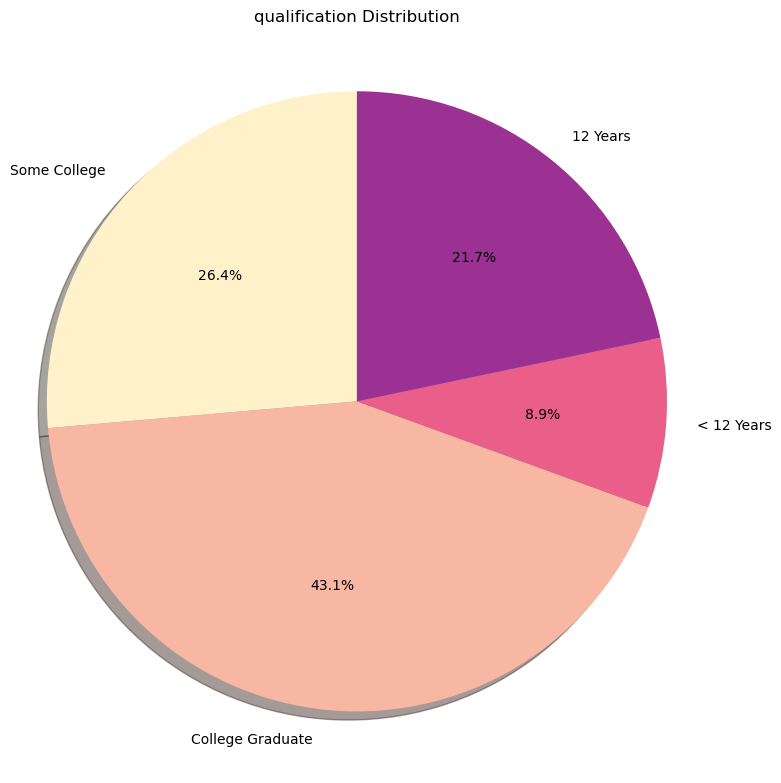

In [61]:
labels = df['qualification'].unique()
sizes = (df['qualification'].value_counts()/df['qualification'].value_counts().sum())*100
sizes = sizes.sort_index(ascending=False)
labels = sizes.index
plt.figure(figsize=(8,8))
colors = ['#FFF1C9', '#F7B7A3', '#EA5F89', '#9B3192', '#57167E']
plt.pie(sizes,labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors)
plt.axis('equal')
plt.title("qualification Distribution")
plt.tight_layout()
plt.show()

In [62]:
df["race"].unique()

array(['White', 'Black', 'Other or Multiple', 'Hispanic'], dtype=object)

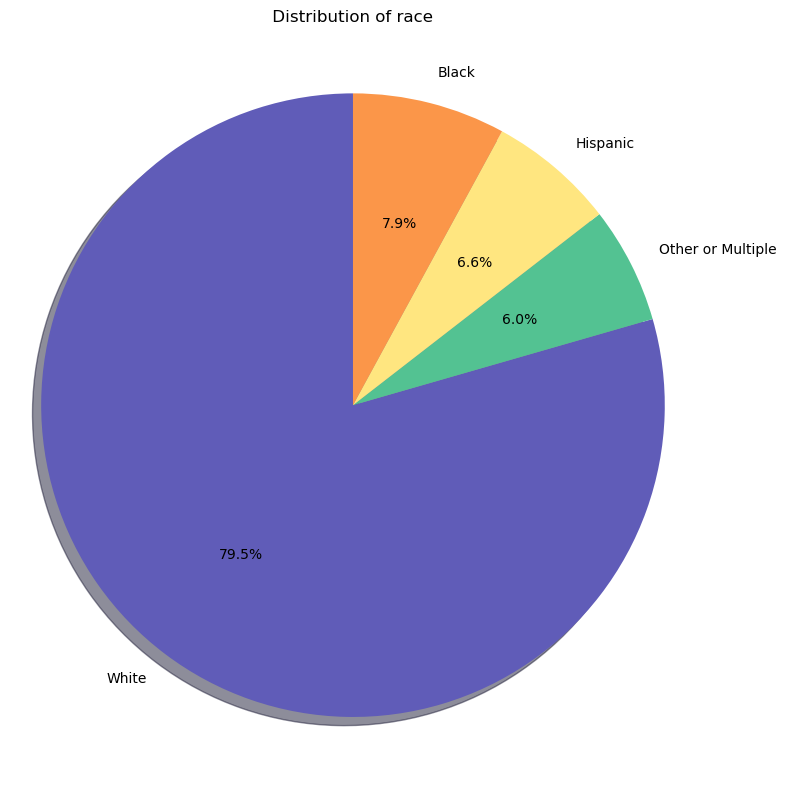

In [63]:
labels = df['race'].unique()
sizes = (df['race'].value_counts()/df['race'].value_counts().sum())*100
sizes = sizes.sort_index(ascending=False)
labels = sizes.index
plt.figure(figsize=(8,8))
colors = ['#605CB8', '#53C292', '#FFE680', '#FB9649', '#E64640']
plt.pie(sizes,labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors)
plt.axis('equal')
plt.title(" Distribution of race ")
plt.tight_layout()
plt.show()

In [64]:
df["sex"].unique()

array(['Female', 'Male'], dtype=object)

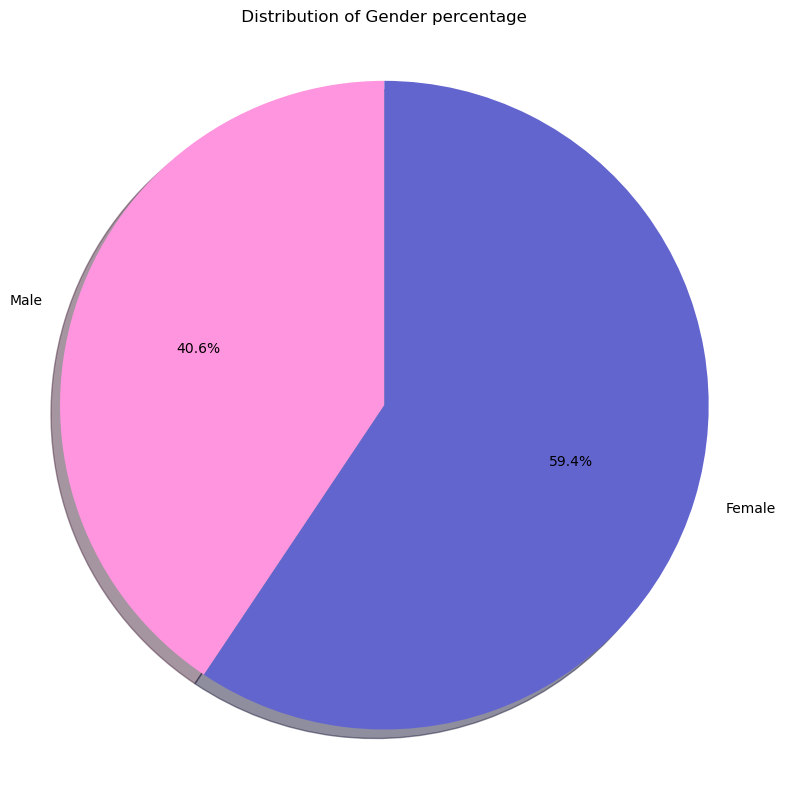

In [65]:
labels = df['sex'].unique()
sizes = (df['sex'].value_counts()/df['sex'].value_counts().sum())*100
sizes = sizes.sort_index(ascending=False)
labels = sizes.index
plt.figure(figsize=(8,8))
colors = ['#FF94DF', '#6365CF']
plt.pie(sizes,labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors)
plt.axis('equal')
plt.title(" Distribution of Gender percentage ")
plt.tight_layout()
plt.show()

In [66]:
df["income_level"].unique()

array(['Below Poverty', '<= $75,000, Above Poverty', '> $75,000'],
      dtype=object)

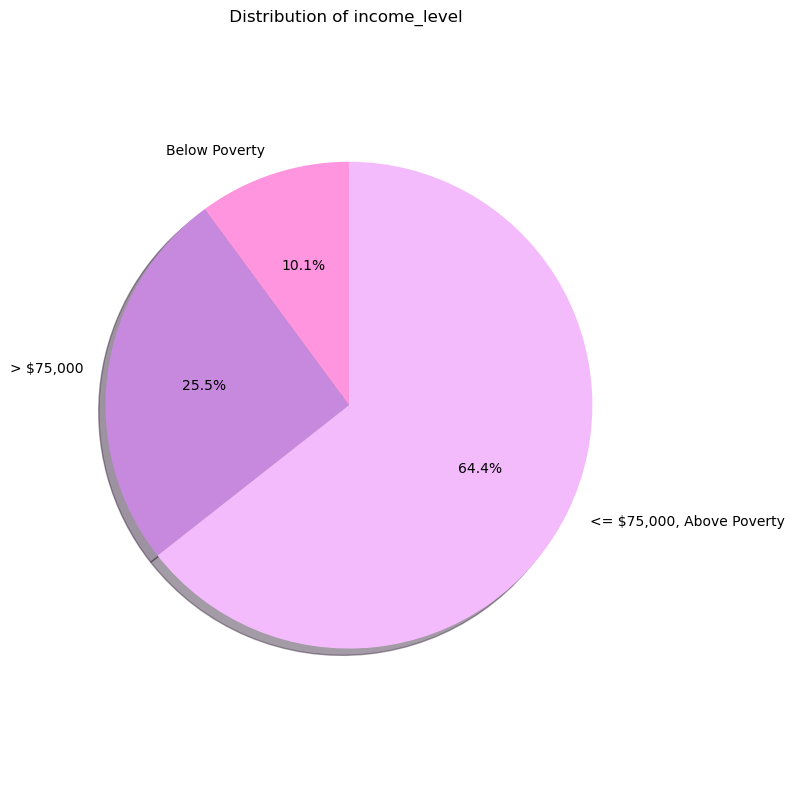

In [67]:
labels = df['income_level'].unique()
sizes = (df['income_level'].value_counts()/df['income_level'].value_counts().sum())*100
sizes = sizes.sort_index(ascending=False)
labels = sizes.index
plt.figure(figsize=(8,8))
colors = ['#FF94DF', '#C789DD', '#F4BBFC', '#FFF5D4', '#FFE4B5']
plt.pie(sizes,labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors)
plt.axis('equal')
plt.title(" Distribution of income_level  ")
plt.tight_layout()
plt.show()

In [68]:
df = pd.get_dummies(df)

In [69]:
x = df.drop(["h1n1_vaccine"],axis = 1)
y = df["h1n1_vaccine"]

In [70]:
x_train ,x_test , y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=0)

In [71]:
model_1=LogisticRegression()
model_1.fit(x_train,y_train)

LogisticRegression()

In [72]:
model_1.score(x_train,y_train)

0.8374183880980414

In [73]:
model_1.score(x_test,y_test)

0.8340616806093145